In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
data=pd.read_csv("50_Startups.csv")

In [3]:
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
data.duplicated().sum()

0

In [8]:
dt=data.rename({"R&D Spend":"rds","Administration":"adms",
                  "Marketing Spend":"mkts"},axis=1)

In [9]:
dt

,rds,adms,mkts,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [10]:
dt

,rds,adms,mkts,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [11]:
dt.corr()

,rds,adms,mkts,Profit
rds,1.000000,0.241955,0.724248,0.972900
adms,0.241955,1.000000,-0.032154,0.200717
mkts,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


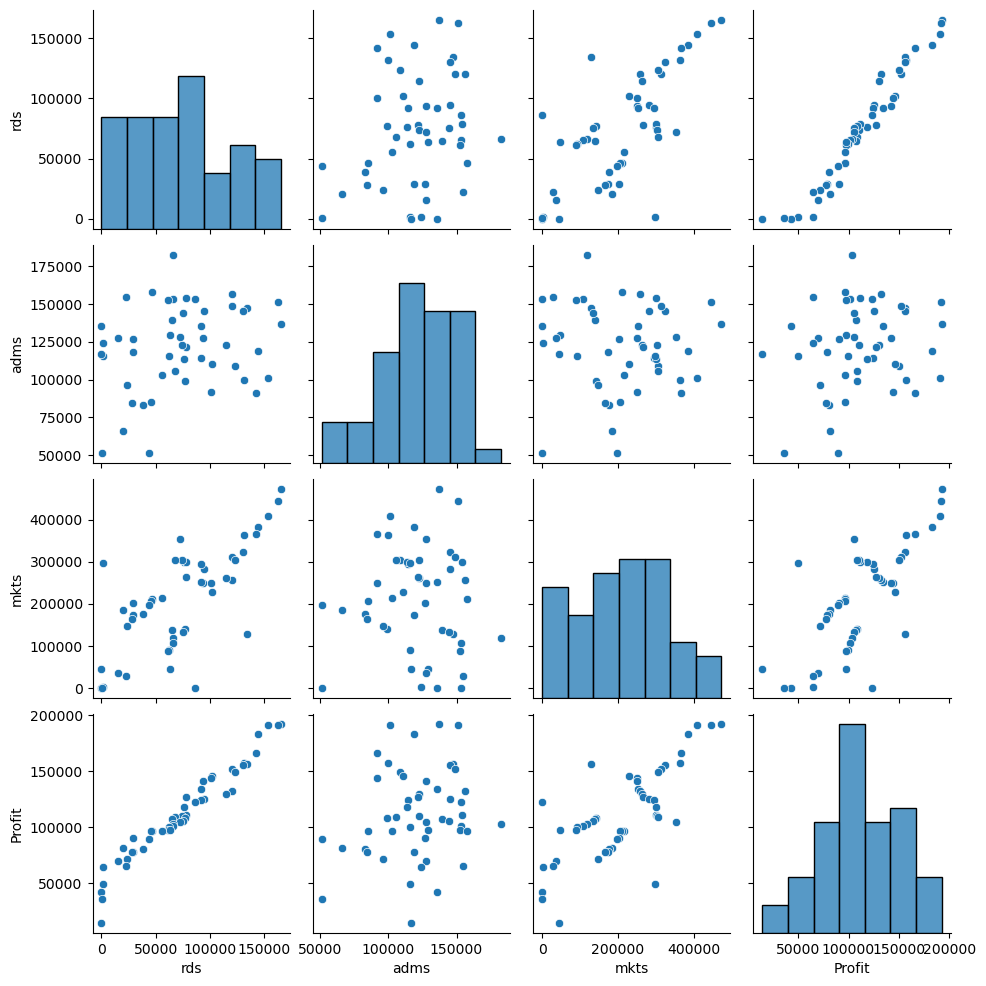

In [12]:
sns.pairplot(dt)

# model fitting


In [13]:
import statsmodels.formula.api as smf

In [14]:
ml=smf.ols('Profit~rds+mkts+adms',data=dt).fit()

In [15]:
ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 02 Feb 2024   Prob (F-statistic):           4.53e-30
Time:                        11:19:54   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
rds            0.8057      0.045     17.846      0.000       0.715       0.897
mkts           0.0272      0.016      1.655      0.105      -0.006       0.060
adms          -0.0268      0.051     -0.526      0.602      -0.130       0.076
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
ml.params

Intercept    50122.192990
rds              0.805715
mkts             0.027228
adms            -0.026816
dtype: float64

In [17]:
ml.pvalues

Intercept    1.057379e-09
rds          2.634968e-22
mkts         1.047168e-01
adms         6.017551e-01
dtype: float64

In [18]:
#p values of mkts marketing and adms administration is greater than 0.05

In [19]:
ml.rsquared,ml.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

# Simple linear regression for adms and mkts since they have insignificant p values to check individually

In [20]:
ml_adm=smf.ols('Profit~adms',data=dt).fit()

In [21]:
ml_adm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Fri, 02 Feb 2024   Prob (F-statistic):              0.162
Time:                        11:19:54   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
adms           0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
ml_mkt=smf.ols('Profit~mkts',data=dt).fit()

In [23]:
ml_mkt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Fri, 02 Feb 2024   Prob (F-statistic):           4.38e-10
Time:                        11:19:55   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
mkts           0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
ml_am=smf.ols('Profit~mkts+adms',data=dt).fit()

In [25]:
ml_am.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Fri, 02 Feb 2024   Prob (F-statistic):           2.50e-10
Time:                        11:19:55   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
mkts           0.2488      0.030      8.281      0.000       0.188       0.309
adms           0.3237      0.131      2.468      0.017       0.060       0.588
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
#p is significant for adms and mkts 

# VIF 

In [27]:
rsq_mkt=smf.ols('mkts~rds+adms',data=dt).fit().rsquared
vif_mkt=1/(1-rsq_mkt)

rsq_rds=smf.ols('rds~mkts+adms',data=dt).fit().rsquared
vif_rds=1/(1-rsq_rds)

rsq_adm=smf.ols('adms~rds+mkts',data=dt).fit().rsquared
vif_adm=1/(1-rsq_adm)

d1={'variable':['marketing','R&Ds','Administration'],'VIF':[vif_mkt,vif_rds,vif_adm]}
vif_table=pd.DataFrame(d1)
vif_table

,variable,VIF
0,marketing,2.326773
1,R&Ds,2.468903
2,Administration,1.175091


# TEST FOR NORMALITY OF RESIDUALS (Q-Q PLOT)

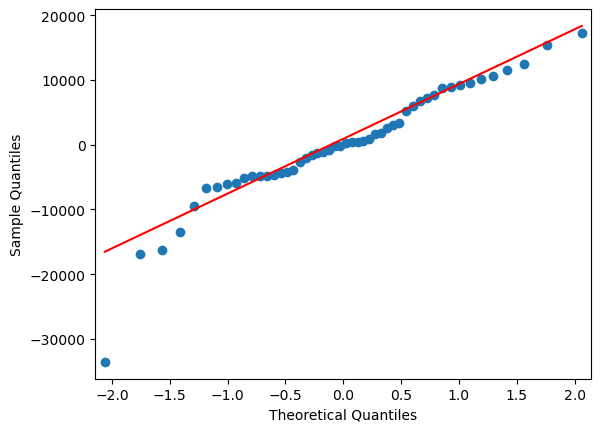

In [28]:
import statsmodels.api as sm
qqplot=sm.qqplot(ml.resid,line='q') #line=45 to draw diagonal line
qqplot

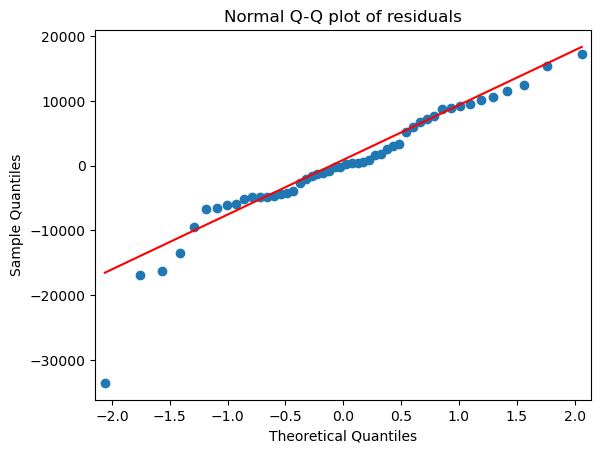

In [29]:
plt.title("Normal Q-Q plot of residuals")
qqplot #or plt.show()

In [30]:
list(np.where(ml.resid<-20000))

[array([49], dtype=int64)]

# Residual plot for Homoscedasticity

In [31]:
def get_standardized_values(vals):
    return(vals-vals.mean())/vals.std()

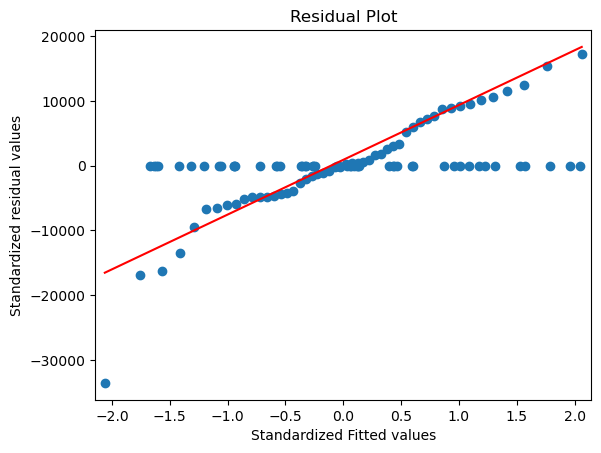

In [32]:
plt.scatter(get_standardized_values(ml.fittedvalues),
           get_standardized_values(ml.resid))#fitted values on x axis and residual values on y axis
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Residual vd Regressors

eval_env: 1


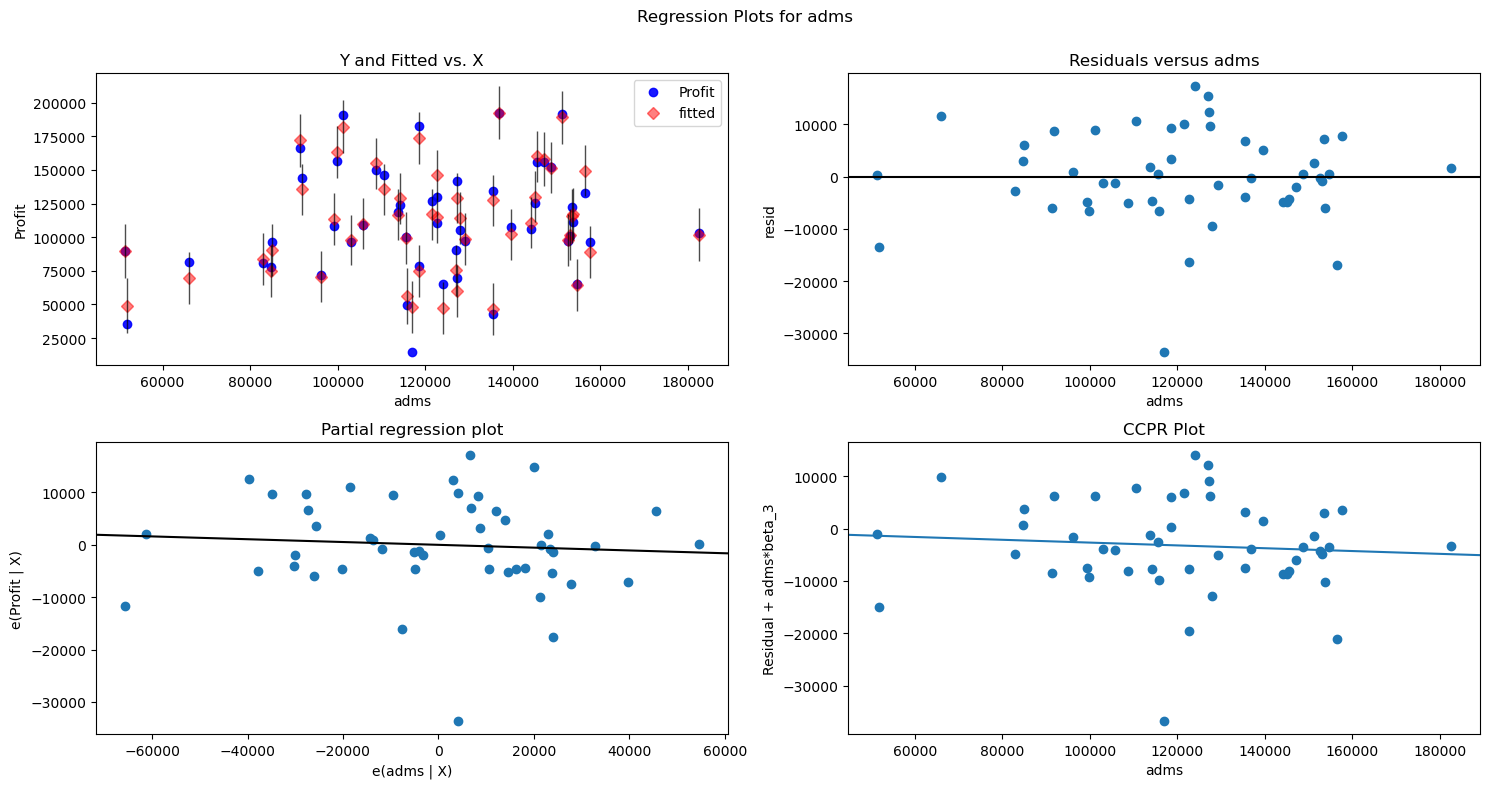

In [33]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(ml,"adms",fig=fig)
plt.show()

eval_env: 1


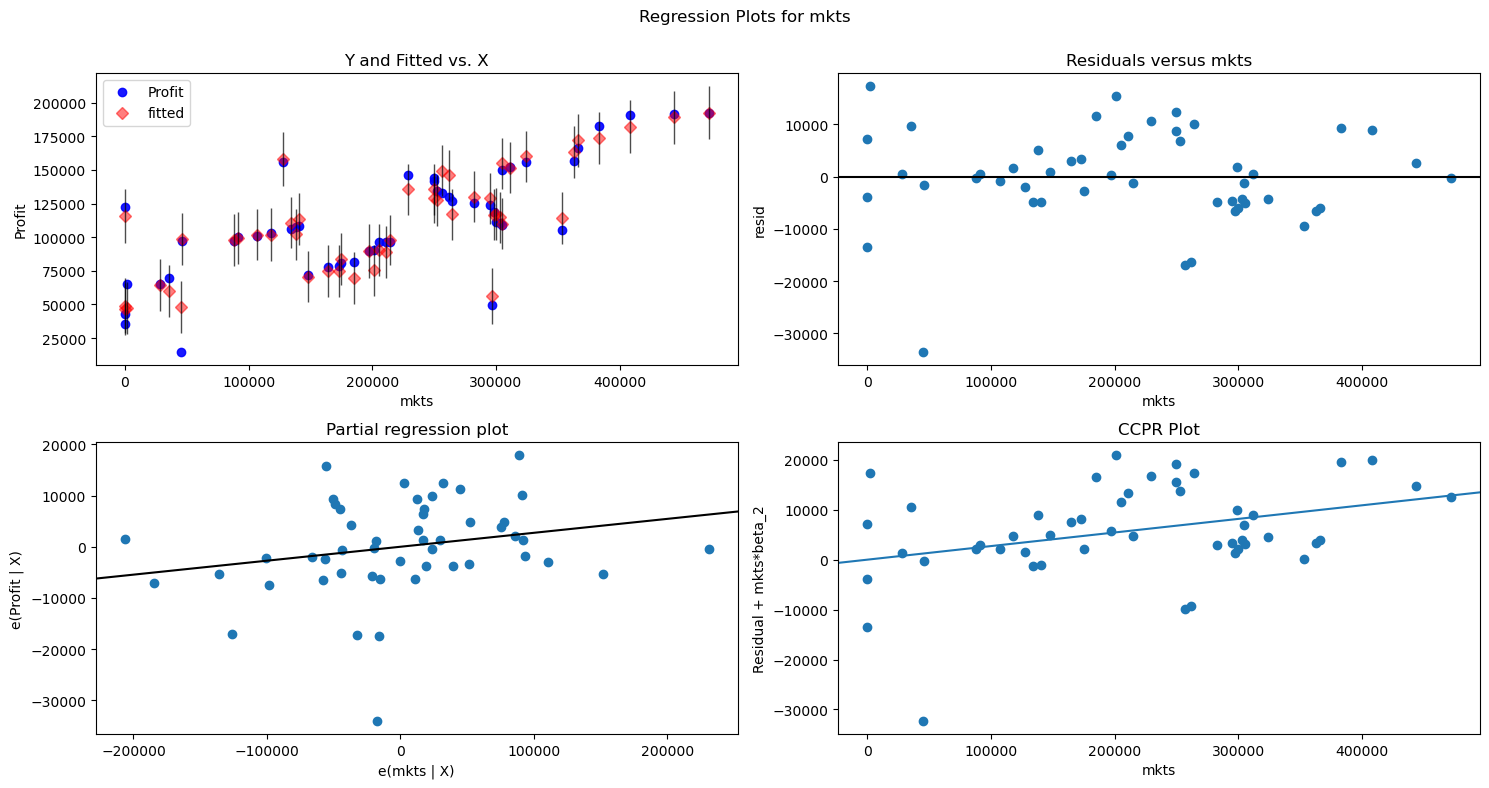

In [34]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(ml,"mkts",fig=fig)
plt.show()

eval_env: 1


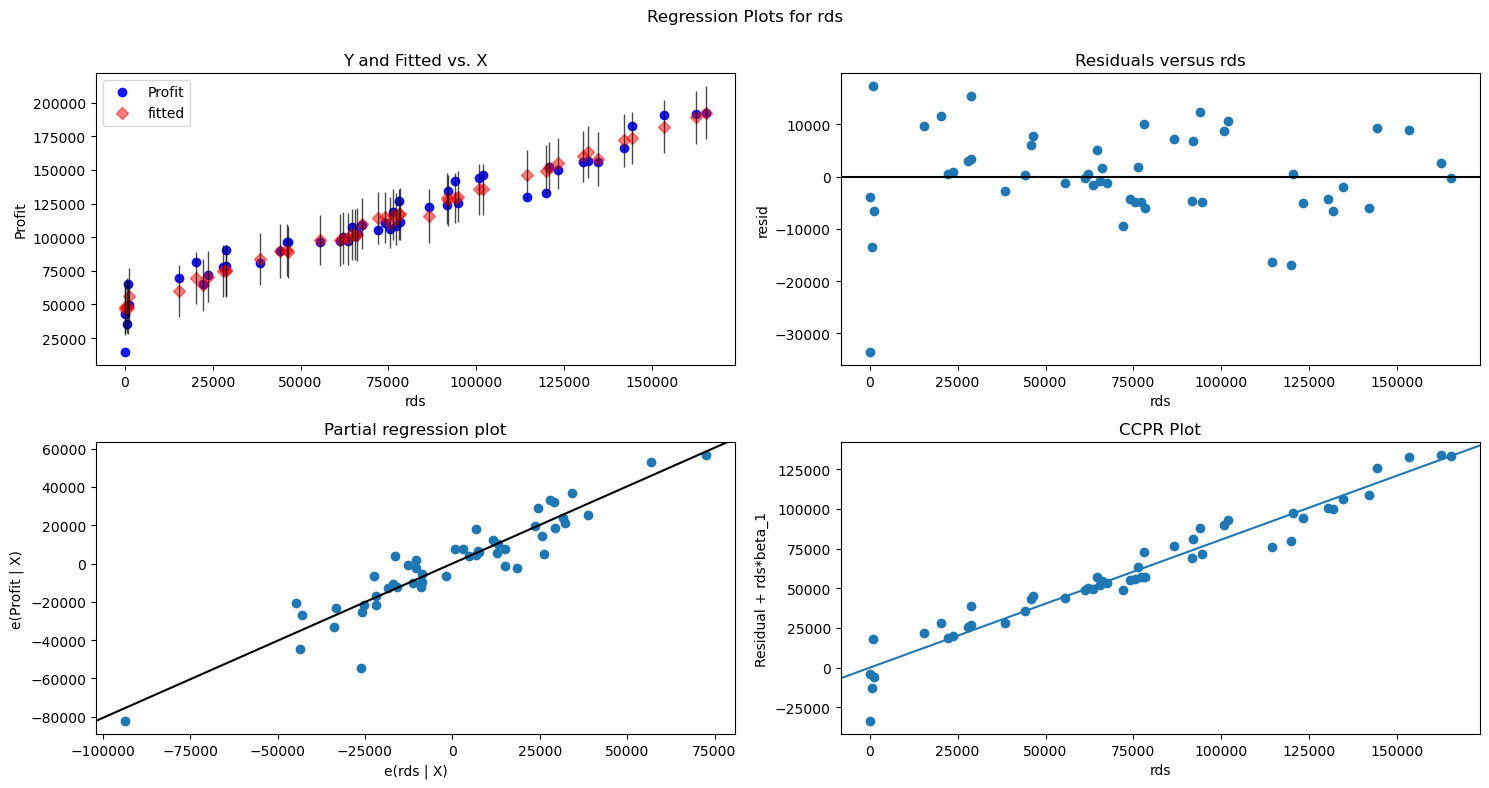

In [35]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(ml,"rds",fig=fig)
plt.show()

# Model detection Diagnostics

Detecting influencers/Outliers

Cooks distance

In [36]:
ml_influence=ml.get_influence()
(c,_)=ml_influence.cooks_distance

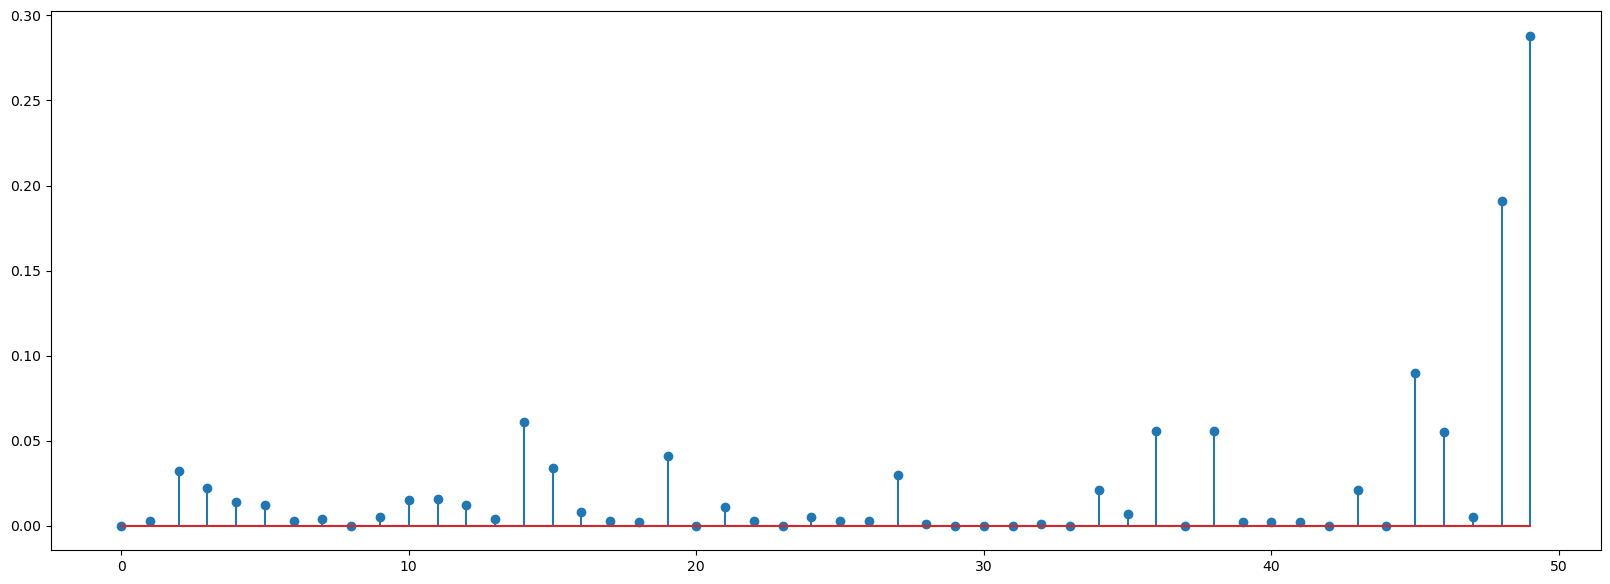

In [37]:
#plotting influencers values using stem plot
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(dt)),np.round(c,3))
plt.show()

In [38]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.2880822927543268)

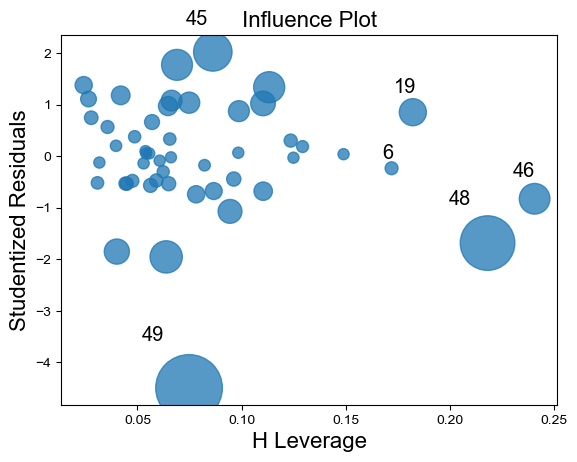

In [39]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(ml)
sns.set_style(style='darkgrid')
plt.show()

In [40]:
k=4 #4independent variables
n=dt.shape[0] #accessing only rows
leverage_cutoff=3*((k+1)/n)

In [41]:
leverage_cutoff

0.30000000000000004

froma bove we se data point 

In [42]:
dt[dt.index.isin([49])]

,rds,adms,mkts,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [43]:
dt2=dt.drop(dt.index[[49]],axis=0).reset_index()
dt2

,index,rds,adms,mkts,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


In [44]:
dt2

,index,rds,adms,mkts,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


In [45]:
dt2=dt2.drop(['index'],axis=1)

In [46]:
dt2

,rds,adms,mkts,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [203]:
while np.max(c)>0.5 :
    model=smf.ols("Profit~rds+adms+mkts",data=dt2).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    data2=dt2.drop(dt2.index[[np.argmax(c)]],
                     axis=0).reset_index(drop=True)
else:
    final_model=smf.ols("Profit~rds+adms+mkts",data=dt2).fit()
    final_model.rsquared , final_model.aic
    print(final_model.rsquared)

0.9613162435129847


In [204]:
final_model.rsquared

0.9613162435129847

In [205]:
new_data=pd.DataFrame({'rds':70000,"adms":90000,"mkts":140000},index=[0])
final_model.predict(new_data)

0    108727.154753
dtype: float64

In [206]:
pred_y=final_model.predict(dt2)

In [207]:
pred_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

In [211]:
d2={'Prep_Models':['Model','Final_Model'],
    'Rsquared':[ml.rsquared,final_model.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.961316


In [47]:
new_ml=smf.ols("Profit~rds+adms+mkts",data=dt2).fit()

In [48]:
new_ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Fri, 02 Feb 2024   Prob (F-statistic):           8.85e-32
Time:                        11:19:58   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
rds            0.7830      0.038     20.470      0.000       0.706       0.860
adms          -0.0222      0.043     -0.518      0.607      -0.109       0.064
mkts           0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
ml_inf=new_ml.get_influence()
(c,_)=ml_inf.cooks_distance

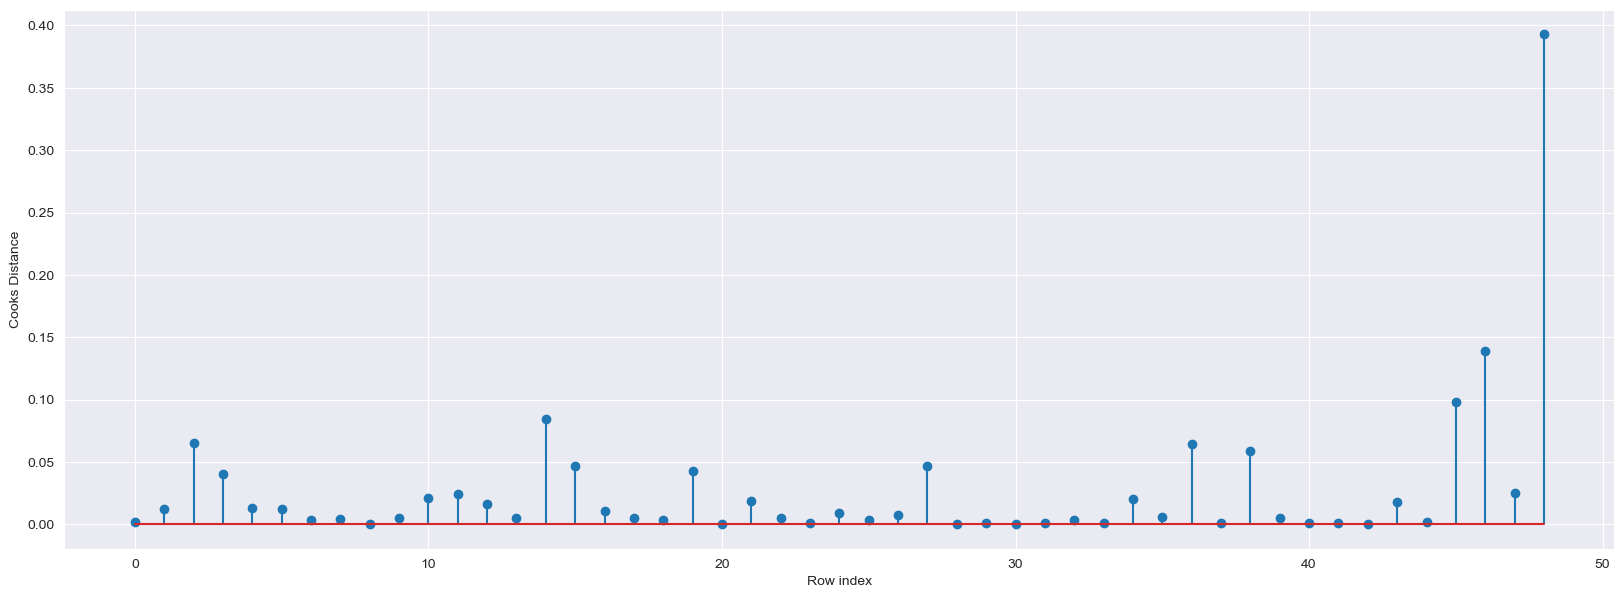

In [50]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.round(c,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [51]:
(np.argmax(c),np.max(c))

(48, 0.39274420556321554)

In [52]:
dt3=dt2.drop(dt2.index[[48]],axis=0).reset_index()

In [53]:
dt3

,index,rds,adms,mkts,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


In [54]:
nmdl=smf.ols("Profit~rds+adms+mkts",data=dt2).fit()
nmdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Fri, 02 Feb 2024   Prob (F-statistic):           8.85e-32
Time:                        11:19:58   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
rds            0.7830      0.038     20.470      0.000       0.706       0.860
adms          -0.0222      0.043     -0.518      0.607      -0.109       0.064
mkts           0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
nmdl_inf = nmdl.get_influence()
(c, _) = nmdl_inf.cooks_distance

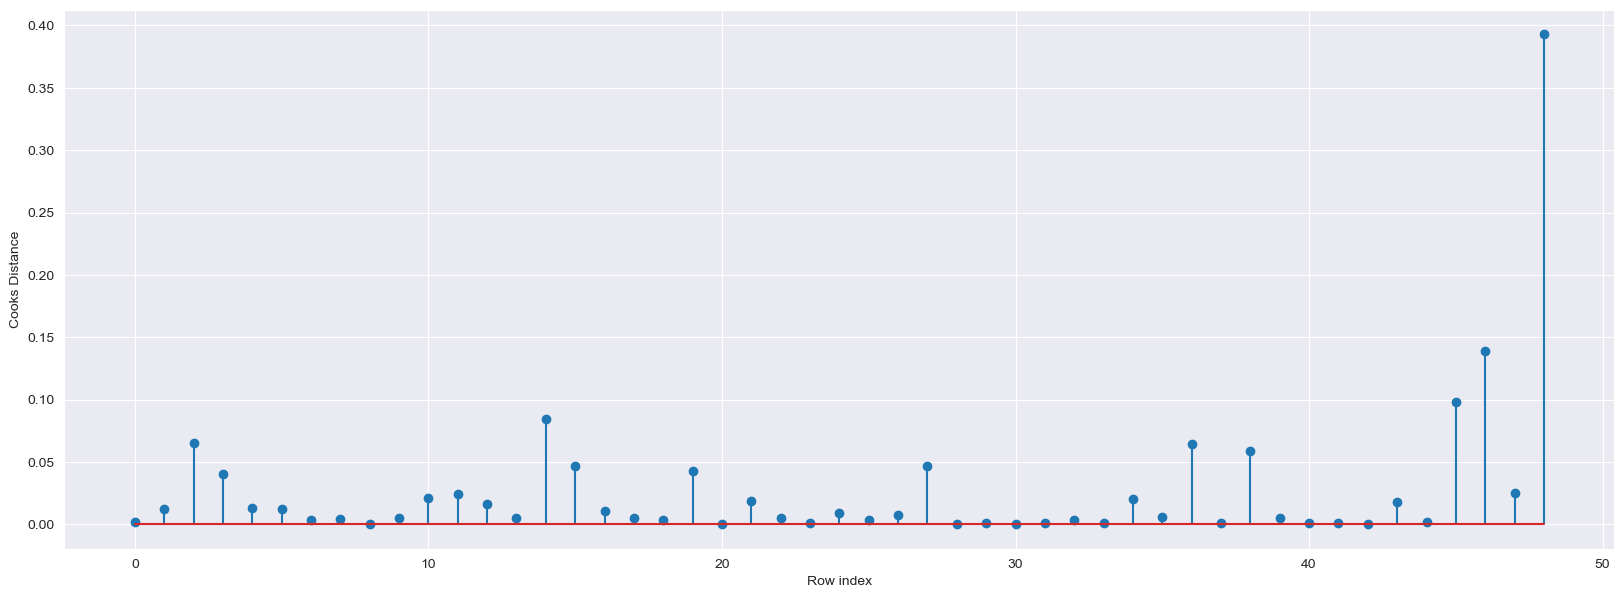

In [56]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.round(c,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [84]:
#index of the data points where c is more than .5
(np.argmax(c),np.max(c))

(45, 0.09283373205094025)

In [85]:
#removing 46 observation

In [86]:
dt4=dt3.drop(dt2.index[[46]],axis=0).reset_index()
dt4

,level_0,index,rds,adms,mkts,State,Profit
0,0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,9,123334.88,108679.17,304981.62,California,149759.96


In [114]:
dt5=dt4.drop(['index'],axis=1)

In [115]:
dt6=dt5.drop(['level_0'],axis=1)
dt6

,rds,adms,mkts,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [116]:
mdnew=smf.ols('Profit~mkts+adms+rds',data=dt6).fit()

In [117]:
mdnew.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     357.1
Date:                Fri, 02 Feb 2024   Prob (F-statistic):           2.12e-30
Time:                        11:34:27   Log-Likelihood:                -482.62
No. Observations:                  47   AIC:                             973.2
Df Residuals:                      43   BIC:                             980.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.823e+04   5905.368      9.860      0.000    4.63e+04    7.01e+04
mkts           0.0251      0.015      1.696      0.097      -0.005       0.055
adms          -0.0532      0.044     -1.202      0.236      -0.142       0.036
rds            0.7642      0.041     18.704      0.000       0.682       0.847
==============================================================================
Omnibus:                        0.366   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.833   Jarque-Bera (JB):                0.530
Skew:                           0.028   Prob(JB):                        0.767
Kurtosis:                       2.483   Cond. No.                     1.57e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [118]:
mdnew_inf=mdnew.get_influence()
(c,_)=mdnew_inf.cooks_distance

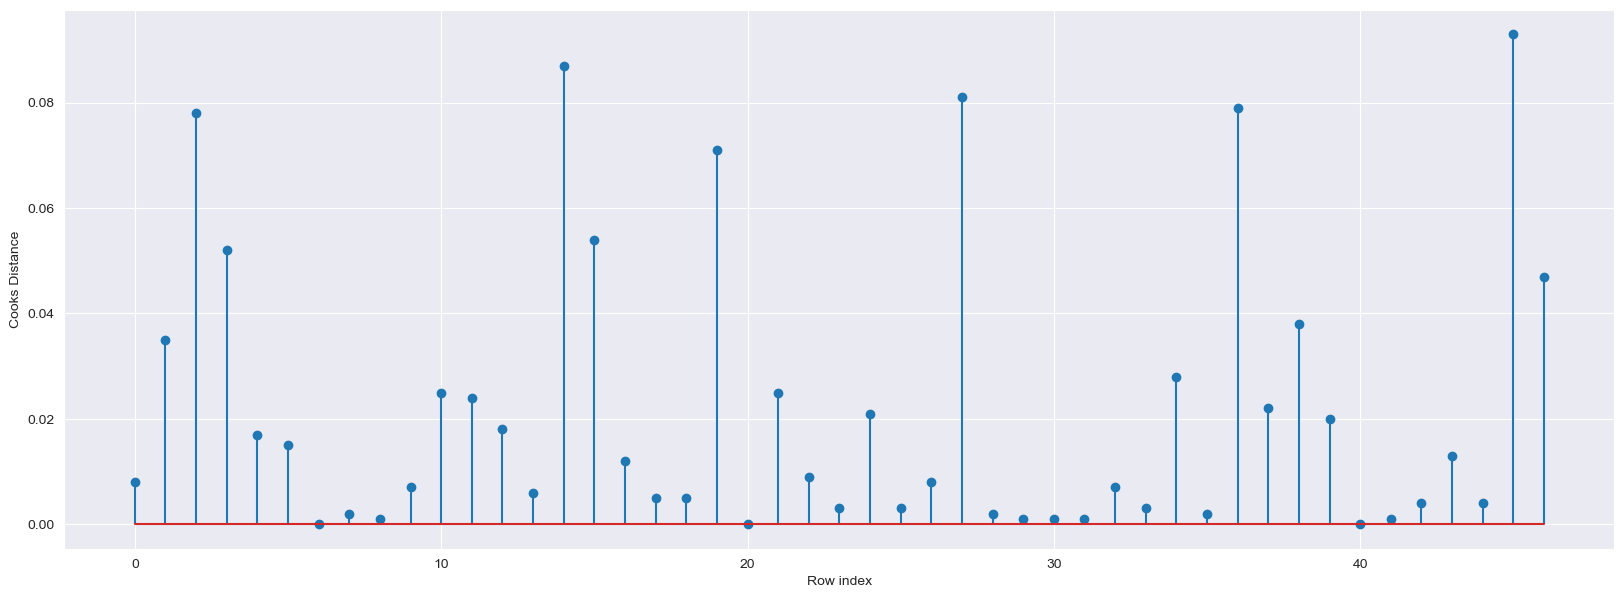

In [119]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.round(c,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [130]:
(np.argmax(c),np.max(c))

(19, 0.09705035449315288)

In [131]:
dt7=dt6.drop(dt6.index[[45]],axis=0).reset_index()

In [132]:
dt7

,index,rds,adms,mkts,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


In [133]:
dt8=dt7.drop(['index'],axis=1)
dt8

,rds,adms,mkts,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [134]:
mdnew1=smf.ols('Profit~mkts+adms+rds',data=dt8).fit()

In [135]:
mdnew.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     357.1
Date:                Fri, 02 Feb 2024   Prob (F-statistic):           2.12e-30
Time:                        11:34:51   Log-Likelihood:                -482.62
No. Observations:                  47   AIC:                             973.2
Df Residuals:                      43   BIC:                             980.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.823e+04   5905.368      9.860      0.000    4.63e+04    7.01e+04
mkts           0.0251      0.015      1.696      0.097      -0.005       0.055
adms          -0.0532      0.044     -1.202      0.236      -0.142       0.036
rds            0.7642      0.041     18.704      0.000       0.682       0.847
==============================================================================
Omnibus:                        0.366   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.833   Jarque-Bera (JB):                0.530
Skew:                           0.028   Prob(JB):                        0.767
Kurtosis:                       2.483   Cond. No.                     1.57e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [136]:
mdnew1_inf=mdnew1.get_influence()
(c,_)=mdnew1_inf.cooks_distance

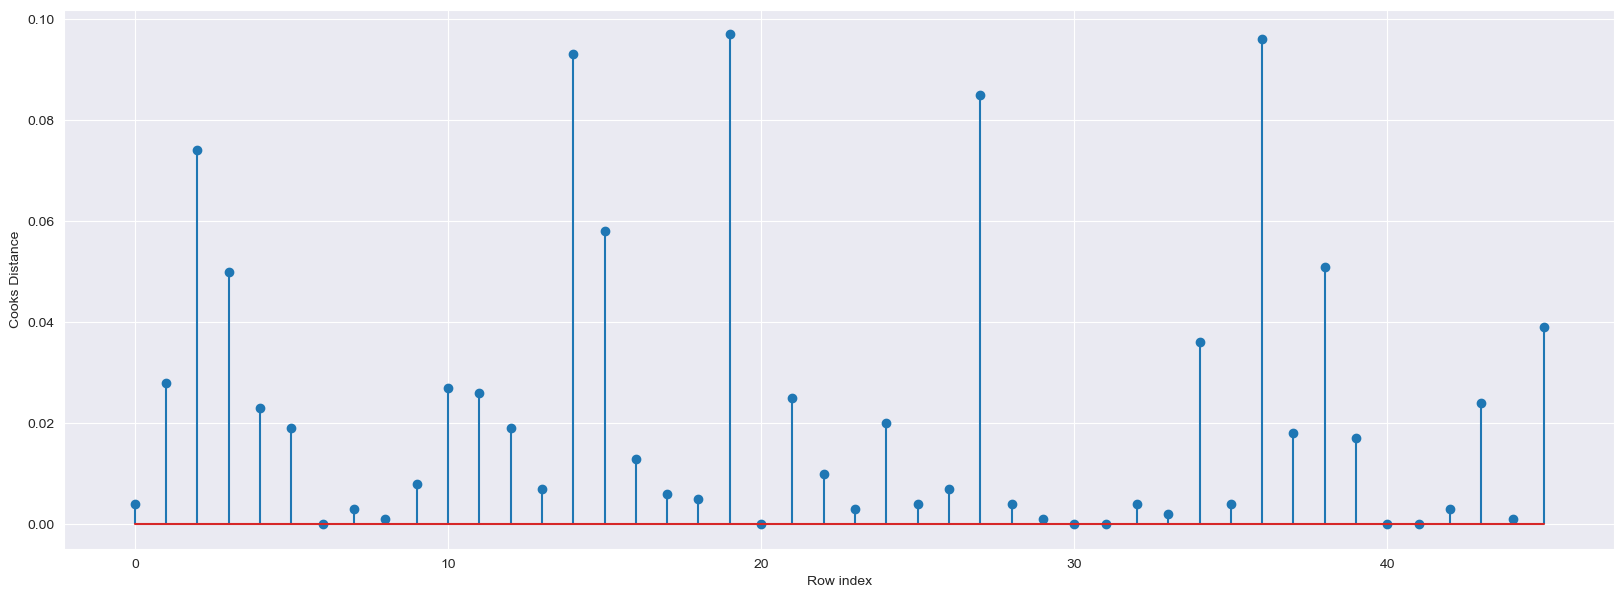

In [137]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.round(c,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [139]:
(np.argmax(c),np.max(c))

(19, 0.09705035449315288)

In [142]:
dt9=dt8.drop(dt8.index[[19]],axis=0).reset_index()
dt9

,index,rds,adms,mkts,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


In [143]:
dt10=dt9.drop(['index'],axis=1)

In [144]:
dt10

,rds,adms,mkts,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [147]:
mdnew2=smf.ols('Profit~mkts+adms+rds',data=dt10).fit()
mdnew2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     364.4
Date:                Fri, 02 Feb 2024   Prob (F-statistic):           1.41e-29
Time:                        11:37:40   Log-Likelihood:                -460.51
No. Observations:                  45   AIC:                             929.0
Df Residuals:                      41   BIC:                             936.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.618e+04   5789.145      9.704      0.000    4.45e+04    6.79e+04
mkts           0.0356      0.016      2.251      0.030       0.004       0.068
adms          -0.0533      0.043     -1.245      0.220      -0.140       0.033
rds            0.7549      0.042     17.952      0.000       0.670       0.840
==============================================================================
Omnibus:                        0.106   Durbin-Watson:                   1.726
Prob(Omnibus):                  0.948   Jarque-Bera (JB):                0.311
Skew:                          -0.042   Prob(JB):                        0.856
Kurtosis:                       2.602   Cond. No.                     1.59e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [148]:
mdnew2_inf=mdnew2.get_influence()
(c,_)=mdnew2_inf.cooks_distance

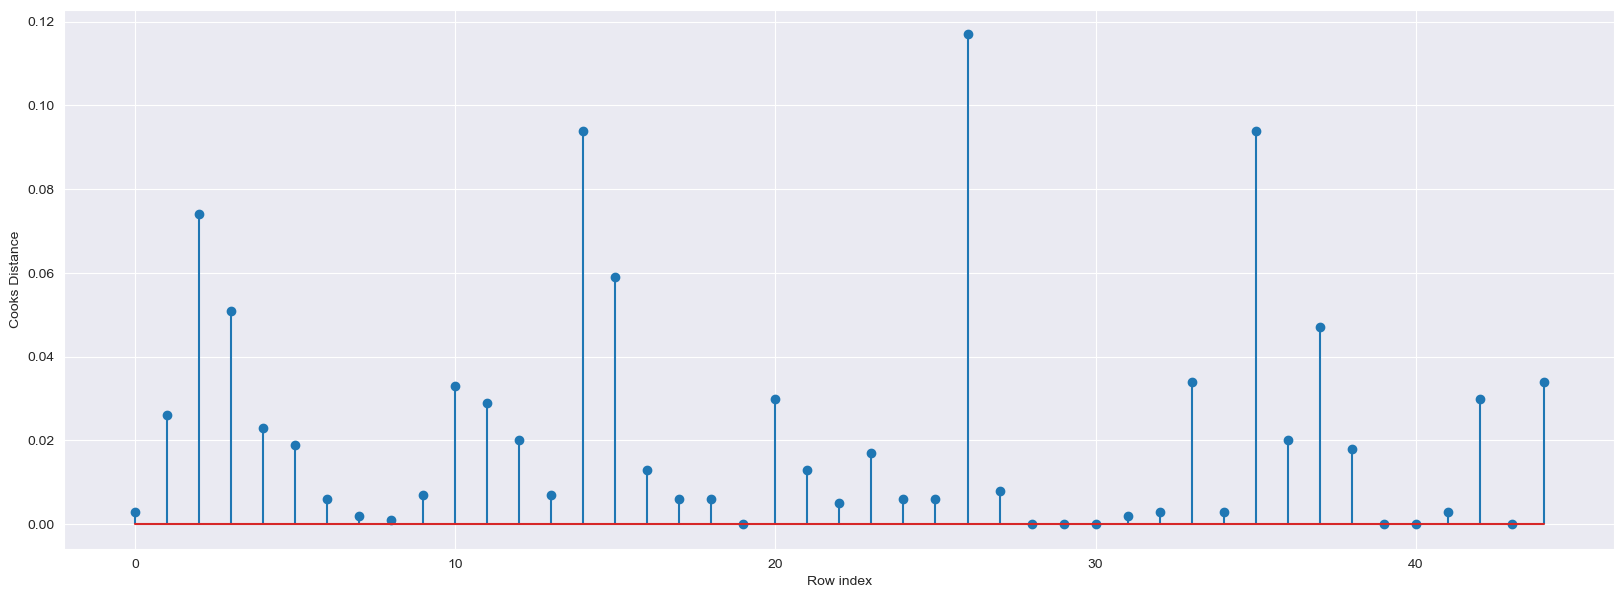

In [149]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.round(c,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [150]:
(np.argmax(c),np.max(c))

(26, 0.1173055942809919)

In [158]:
dt11=dt10.drop(dt10.index[[26]],axis=0).reset_index()
dt11

,index,rds,adms,mkts,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


In [160]:
dt12=dt11.drop(['index'],axis=1)
dt12

,rds,adms,mkts,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [161]:
mdnew3=smf.ols('Profit~mkts+adms+rds',data=dt12).fit()
mdnew3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     383.4
Date:                Fri, 02 Feb 2024   Prob (F-statistic):           1.71e-29
Time:                        11:48:23   Log-Likelihood:                -449.10
No. Observations:                  44   AIC:                             906.2
Df Residuals:                      40   BIC:                             913.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    5.45e+04   5720.903      9.527      0.000    4.29e+04    6.61e+04
mkts           0.0454      0.016      2.773      0.008       0.012       0.079
adms          -0.0408      0.042     -0.963      0.341      -0.126       0.045
rds            0.7325      0.043     17.081      0.000       0.646       0.819
==============================================================================
Omnibus:                        0.078   Durbin-Watson:                   1.690
Prob(Omnibus):                  0.962   Jarque-Bera (JB):                0.269
Skew:                          -0.058   Prob(JB):                        0.874
Kurtosis:                       2.635   Cond. No.                     1.58e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

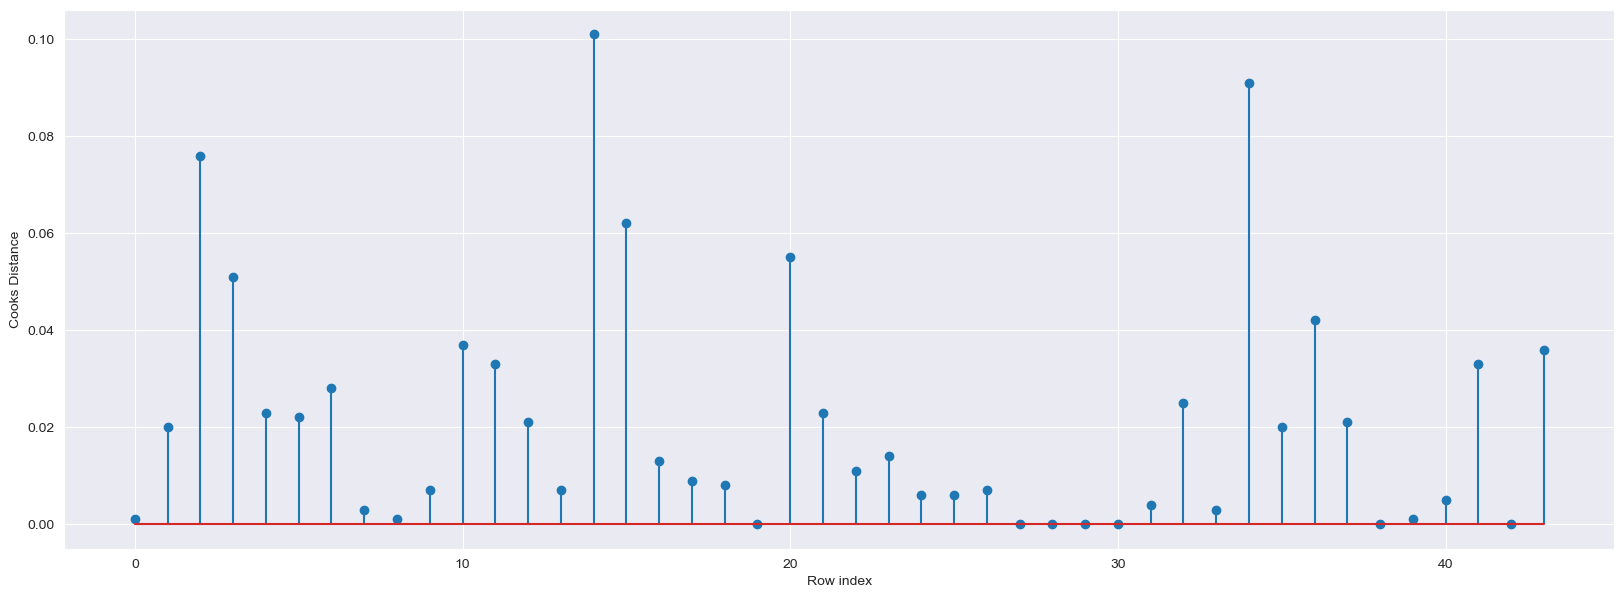

In [162]:
mdnew3_inf=mdnew3.get_influence()
(c,_)=mdnew3_inf.cooks_distance
fig= plt.subplots(figsize=(20,7))
plt.stem(np.round(c,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [163]:
(np.argmax(c),np.max(c))

(14, 0.1007432623513342)

In [175]:
dt13=dt12.drop(dt12.index[[14]],axis=0).reset_index()
dt13

,index,rds,adms,mkts,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


In [176]:
dt14=dt13.drop(['index'],axis=1)
dt14

,rds,adms,mkts,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [177]:
mdnew4=smf.ols('Profit~mkts+adms+rds',data=dt14).fit()
mdnew4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     429.3
Date:                Fri, 02 Feb 2024   Prob (F-statistic):           6.76e-30
Time:                        11:51:42   Log-Likelihood:                -436.42
No. Observations:                  43   AIC:                             880.8
Df Residuals:                      39   BIC:                             887.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.276e+04   5456.318      9.670      0.000    4.17e+04    6.38e+04
mkts           0.0438      0.015      2.829      0.007       0.013       0.075
adms          -0.0270      0.040     -0.668      0.508      -0.109       0.055
rds            0.7422      0.041     18.219      0.000       0.660       0.825
==============================================================================
Omnibus:                        0.128   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.938   Jarque-Bera (JB):                0.314
Skew:                           0.089   Prob(JB):                        0.855
Kurtosis:                       2.621   Cond. No.                     1.58e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

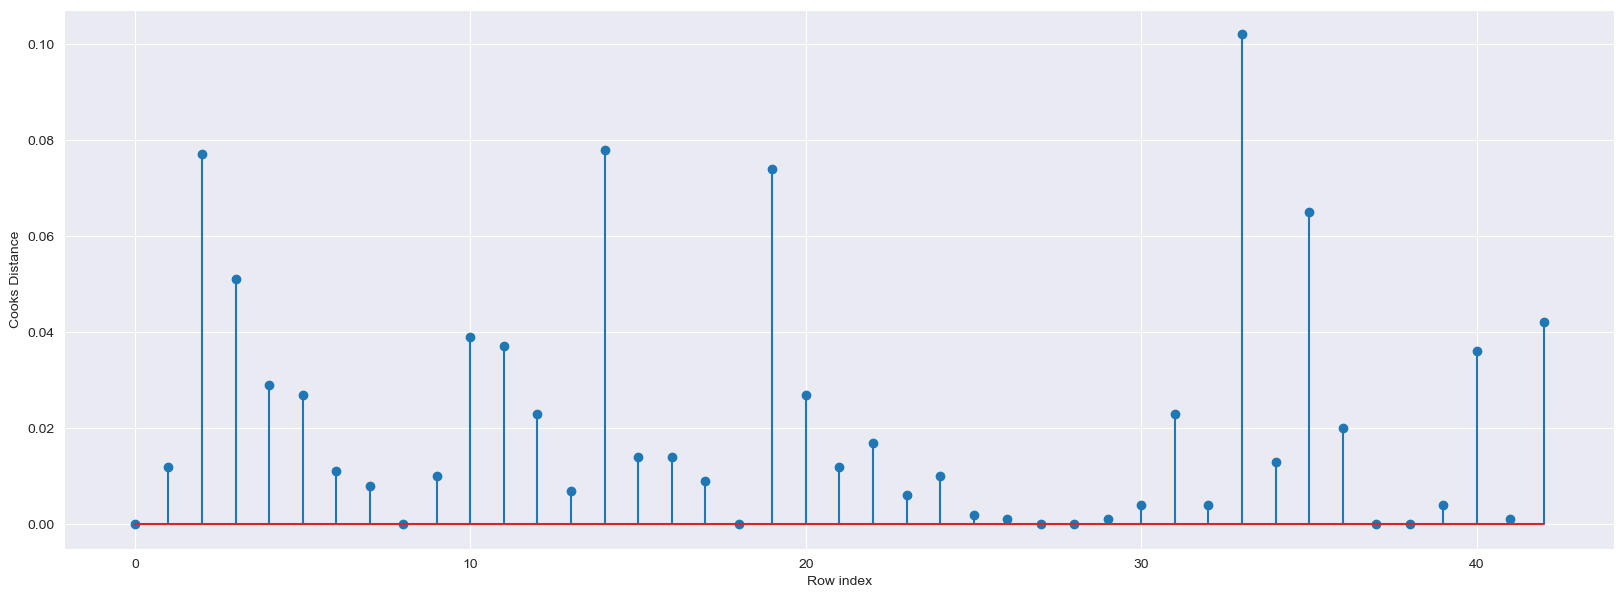

In [178]:
mdnew4_inf=mdnew4.get_influence()
(c,_)=mdnew4_inf.cooks_distance
fig= plt.subplots(figsize=(20,7))
plt.stem(np.round(c,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [179]:
(np.argmax(c),np.max(c))

(33, 0.10210259020114337)

In [180]:
dt15=dt14.drop(dt14.index[[33]],axis=0).reset_index()
dt15

,index,rds,adms,mkts,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


In [181]:
dt16=dt15.drop(['index'],axis=1)
dt16

,rds,adms,mkts,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [182]:
mdnew5=smf.ols('Profit~mkts+adms+rds',data=dt16).fit()
mdnew5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     452.7
Date:                Fri, 02 Feb 2024   Prob (F-statistic):           9.04e-30
Time:                        11:53:17   Log-Likelihood:                -424.86
No. Observations:                  42   AIC:                             857.7
Df Residuals:                      38   BIC:                             864.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.349e+04   5296.591     10.100      0.000    4.28e+04    6.42e+04
mkts           0.0372      0.015      2.416      0.021       0.006       0.068
adms          -0.0381      0.040     -0.964      0.341      -0.118       0.042
rds            0.7650      0.041     18.554      0.000       0.682       0.848
==============================================================================
Omnibus:                        0.015   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.992   Jarque-Bera (JB):                0.074
Skew:                           0.016   Prob(JB):                        0.964
Kurtosis:                       2.797   Cond. No.                     1.57e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

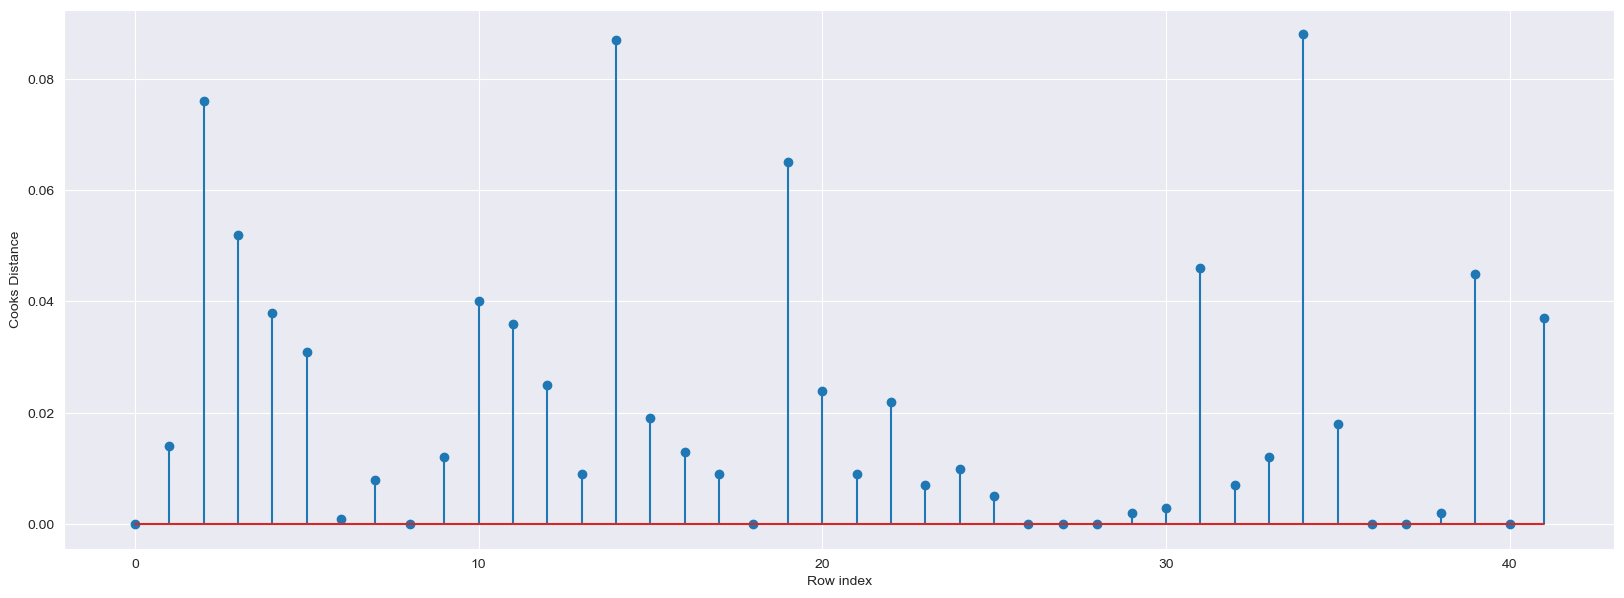

In [183]:
mdnew5_inf=mdnew5.get_influence()
(c,_)=mdnew5_inf.cooks_distance
fig= plt.subplots(figsize=(20,7))
plt.stem(np.round(c,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [184]:
(np.argmax(c),np.max(c))

(34, 0.08803070832215691)

In [185]:
dt17=dt16.drop(dt16.index[[34]],axis=0).reset_index()
dt17
dt18=dt17.drop(['index'],axis=1)
dt18


,rds,adms,mkts,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [186]:
mdnew5=smf.ols('Profit~mkts+adms+rds',data=dt18).fit()
mdnew5.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     451.8
Date:                Fri, 02 Feb 2024   Prob (F-statistic):           3.47e-29
Time:                        13:28:53   Log-Likelihood:                -414.21
No. Observations:                  41   AIC:                             836.4
Df Residuals:                      37   BIC:                             843.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.132e+04   5465.394      9.390      0.000    4.02e+04    6.24e+04
mkts           0.0352      0.015      2.299      0.027       0.004       0.066
adms          -0.0252      0.040     -0.626      0.535      -0.107       0.056
rds            0.7754      0.041     18.714      0.000       0.691       0.859
==============================================================================
Omnibus:                        0.225   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.894   Jarque-Bera (JB):                0.007
Skew:                           0.032   Prob(JB):                        0.996
Kurtosis:                       3.006   Cond. No.                     1.63e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

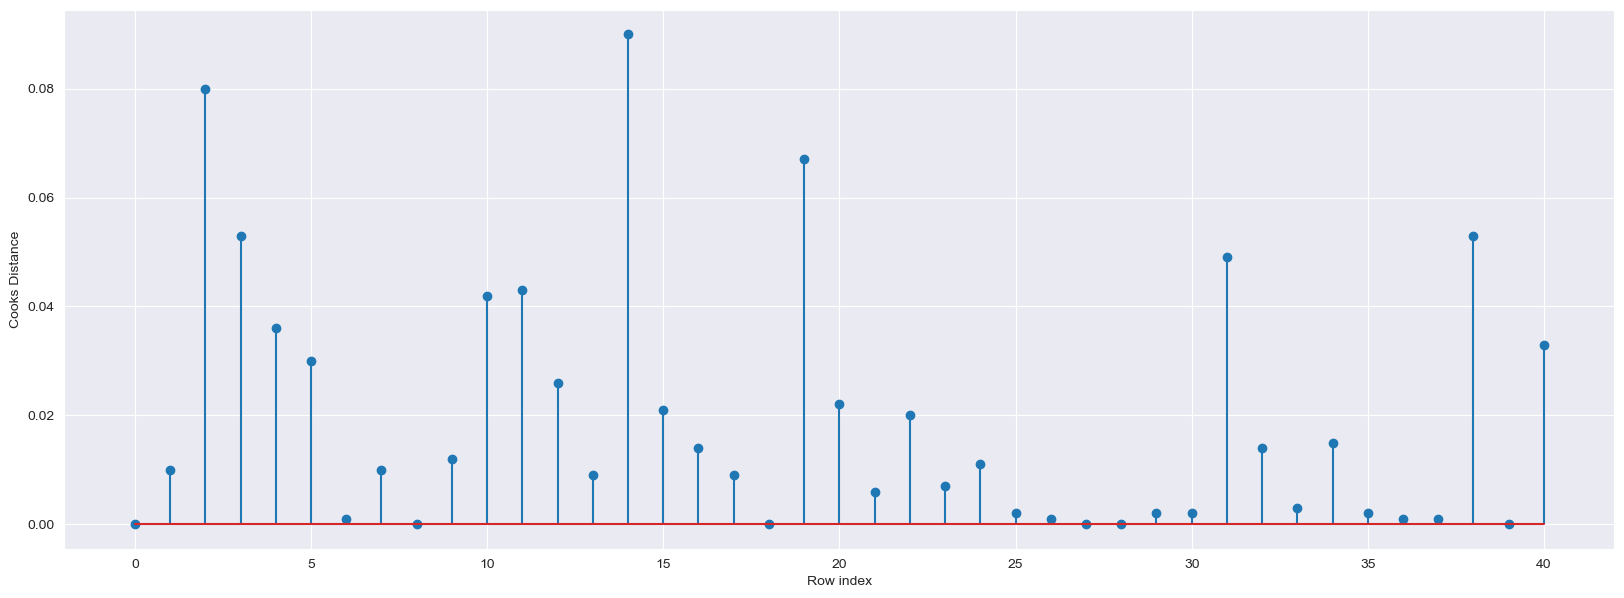

In [187]:
mdnew5_inf=mdnew5.get_influence()
(c,_)=mdnew5_inf.cooks_distance
fig= plt.subplots(figsize=(20,7))
plt.stem(np.round(c,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [188]:
(np.argmax(c),np.max(c))

(14, 0.08968590231235296)

In [189]:
dt19=dt18.drop(dt18.index[[14]],axis=0).reset_index()
dt19
dt20=dt19.drop(['index'],axis=1)
dt20

,rds,adms,mkts,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [190]:
mdnew6=smf.ols('Profit~mkts+adms+rds',data=dt20).fit()
mdnew6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     548.2
Date:                Fri, 02 Feb 2024   Prob (F-statistic):           4.36e-30
Time:                        13:31:24   Log-Likelihood:                -400.25
No. Observations:                  40   AIC:                             808.5
Df Residuals:                      36   BIC:                             815.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.185e+04   4973.070     10.427      0.000    4.18e+04    6.19e+04
mkts           0.0314      0.014      2.250      0.031       0.003       0.060
adms          -0.0301      0.037     -0.823      0.416      -0.104       0.044
rds            0.7916      0.038     20.791      0.000       0.714       0.869
==============================================================================
Omnibus:                        4.239   Durbin-Watson:                   1.404
Prob(Omnibus):                  0.120   Jarque-Bera (JB):                2.840
Skew:                           0.477   Prob(JB):                        0.242
Kurtosis:                       2.109   Cond. No.                     1.61e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""